# Setup

In [2]:
import ipyfan
from ipyfan.utils import norm_fn, rgba2rgb
import numpy as np
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
from ipyfan.iis_model import ritm_model as iis_model  # load interactive segmentation model
# iis_model = None  # or don't

ipyfan.ritm.isegm.model.is_hrnet_model


/home/franchesoni/mine/creations/phd/projects/jupyter_segmentation/atry/ipyfan/env_ipyfan/lib/python3.10/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/franchesoni/mine/creations/phd/projects/jupyter_segmentation/atry/ipyfan/ipyfan/ritm/isegm/utils/cython/_get_dist_maps.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /home/franchesoni/mine/creations/phd/projects/jupyter_segmentation/atry/ipyfan/env_ipyfan/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948,
                 from /home/franchesoni/mine/creations/phd/projects/jupyter_segmentation/atry/ipyfan/env_ipyfan/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/franchesoni/mine/creations/phd/projects/jupyter_segmentation/atry/ipyfan/env_ipyfan/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobj

torch.nn.modules.batchnorm


# Load your data

In [4]:
list_imgs = glob.glob('figs/*')
out_folder = 'out/'
labels_folder = 'labels/'

print(list_imgs)
img_ind = 2

curr_im = (255*norm_fn(plt.imread(list_imgs[img_ind]))).astype(np.uint8)
curr_ref=None

['figs/screen.png', 'figs/screen_small.png', 'figs/chairs.png', 'figs/obama.webp']


# Config your buttons

In [6]:
validate_button = widgets.Button(
        description='Validate',
        disabled=False)

fig = plt.figure(1)
def validate(b):
    global w, fig
    fig.add_subplot(1,1,1)
    plt.imshow(w.annI[:, :, 0], interpolation='NEAREST')
    w.reset()

validate_button.on_click(validate)


<Figure size 432x288 with 0 Axes>

# Put your buttons in a box with the segmenter and run!

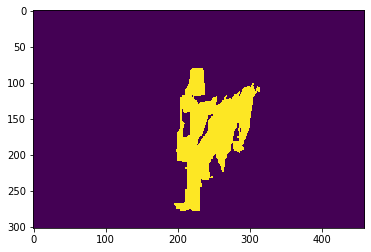

In [8]:
layout_size = 400
# s = ipyfan.FullSegmenter(curr_im, curr_ref, layout_size, iis_model)
s = ipyfan.FullSegmenter(iis_model, curr_im, curr_ref)
w = s.w  # this is how we access internal variables
widgets.VBox([s.get_widget(), validate_button])